In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv('CARS_PAID_Final.txt', encoding="ISO-8859-1")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cars.head()

,vendor_id,dealer_name,address_line1,address_line2,address_line3,address_line4,city,state,ZIP,area_code,...,trade_in_NMVTIS_flag,trade_in_odometer_reading,new_vehicle_VIN_trunc,new_vehicle_category,new_vehicle_make,new_vehicle_model,new_vehicle_year,new_vehicle_drive_train,new_vehicle_car_mileage,new_vehicle_MSRP
0,1,"HUDIBURG MOTORS, INC.",5800 Tinker Diagonal,NaN,NaN,NaN,Midwest City,OK,73110,NaN,...,,166000,1NXBU4EE7AZXXXXXX,P,Toyota,Corolla,2010,"1.8L, 4 cyl, Automatic 4-spd, FWD, Regular",29,17250
1,1,"HUDIBURG MOTORS, INC.",5800 Tinker Diagonal,NaN,NaN,NaN,Midwest City,OK,73110,NaN,...,,231519,1NXBU40E49ZXXXXXX,P,Toyota,Corolla,2009,"1.8L, 4 cyl, Automatic 4-spd, FWD, Regular",30,16750
2,1,"HUDIBURG MOTORS, INC.",5800 Tinker Diagonal,NaN,NaN,NaN,Midwest City,OK,73110,NaN,...,,130648,JTEDS41A592XXXXXX,1,Toyota,Highlander 2WD,2009,"3.5L, 6 cyl, Automatic (S5), FWD, Regular",20,27600
3,1,"HUDIBURG MOTORS, INC.",5800 Tinker Diagonal,NaN,NaN,NaN,Midwest City,OK,73110,NaN,...,,178733,4T3ZK11A69UXXXXXX,1,Toyota,Venza,2009,"3.5L, 6 cyl, Automatic (S6), FWD, Regular",22,27800
4,1,"HUDIBURG MOTORS, INC.",5800 Tinker Diagonal,NaN,NaN,NaN,Midwest City,OK,73110,NaN,...,,93105,4T4BF3EK2ARXXXXXX,P,Toyota,Camry,2010,"2.5L, 4 cyl, Automatic (S6), FWD, Regular",26,21900


In [4]:
cars.shape

(677238, 42)

In [5]:
cars.dtypes

vendor_id                           int64
dealer_name                        object
address_line1                      object
address_line2                      object
address_line3                      object
address_line4                      object
city                               object
state                              object
ZIP                                object
area_code                         float64
phone                              object
invoice_id                          int64
invoice_num                        object
invoice_date                       object
sale_date                          object
disposal_status                    object
disposal_facility_nmvtis_id       float64
disposal_facility_contact_info     object
sales_type                         object
invoice_amount                      int64
trade_in_VIN                       object
trade_in_vehicle_category          object
trade_in_make                      object
trade_in_model                    

In [6]:
# total amount spent
cars.invoice_amount.sum()

2851092000

In [7]:
# total amounts spent per car
cars.invoice_amount.value_counts()

4500    480759
3500    196479
Name: invoice_amount, dtype: int64

## Question 1

Define one or more metrics that can be used to measure the success of the program.
Identify the 10 most successful states and the 10 least successful states based on your
metric(s), and show the performance in these 20 states.

Goal of program was to promote economic stimulus by boosting auto sales and putting safer & clearner, more fuel efficeint vehicles on the road.

#### Measuring Success

* Was there an improvement in average trade-in mpg to average new car mpg?
* Was the amount spent worth the total car sales?

#### Potential Metrics

* cars bought per dollars spent
* MPG saved per dollars spent
* amount spent per car sales (in transactions & dollars)
* total number car sales
* total amount of car sales (in dollars)
* average MPG improvement


In [8]:
# what was average MPG in old vs new cars?
cars[['trade_in_mileage', 'new_vehicle_car_mileage']].agg([np.mean, np.median])

,trade_in_mileage,new_vehicle_car_mileage
mean,15.698425,24.870842
median,16.000000,25.000000


In [9]:
# MPG improved by dollar spent
(cars['new_vehicle_car_mileage'].sum()-cars['trade_in_mileage'].sum())/cars['invoice_amount'].sum() * 1000

2.178782375314441

In [10]:
# any cases where MPG did not improve?

improved_mpg = cars.trade_in_mileage < cars.new_vehicle_car_mileage

cars['improved_mpg'] = improved_mpg

In [11]:
cars['improved_mpg'].value_counts()

True     675026
False      2212
Name: improved_mpg, dtype: int64

In [101]:
numerical_features = ['invoice_amount', 'trade_in_mileage', 'trade_in_odometer_reading', 'new_vehicle_car_mileage', 
                      'new_vehicle_MSRP', ]

cars[numerical_features].describe(percentiles=[.05, .10, .25, .75, .90, .95, .99])

,invoice_amount,trade_in_mileage,trade_in_odometer_reading,new_vehicle_car_mileage,new_vehicle_MSRP
count,669310.000000,669310.000000,6.693100e+05,669310.000000,669310.000000
mean,4214.249003,15.808658,1.599437e+05,24.970431,22403.482355
std,451.771701,1.817577,2.669316e+05,5.736502,5840.727067
min,3500.000000,8.000000,0.000000e+00,14.000000,1.000000
5%,3500.000000,13.000000,7.303045e+04,17.000000,14820.000000
10%,3500.000000,13.000000,8.914090e+04,19.000000,16100.000000
25%,3500.000000,15.000000,1.134870e+05,22.000000,17950.000000
50%,4500.000000,16.000000,1.447700e+05,25.000000,21705.000000
75%,4500.000000,18.000000,1.799620e+05,28.000000,25620.000000
90%,4500.000000,18.000000,2.172780e+05,29.000000,30415.000000


In [13]:
# clean data removing rows that have no mileage 

cars = cars[(cars['trade_in_mileage'] > 0) & (cars['new_vehicle_car_mileage'] > 0)]

In [14]:
# get percent of total that had improved MPGs
total_improvements = cars['improved_mpg'].value_counts()
total_improvements/total_improvements.sum()

True     0.999403
False    0.000597
Name: improved_mpg, dtype: float64

In [55]:
# number of transactions
cars['invoice_amount'].size

672040

In [16]:
# invoice amoutn vs MSRP`
cars[['invoice_amount', 'new_vehicle_MSRP']].agg([len, np.sum])

,invoice_amount,new_vehicle_MSRP
len,672040,672040
sum,2832128000,15055813523


In [17]:
# get total spent per car sold

amt_per_transaction = lambda x: x.sum()/x.size

cars[['invoice_amount']].apply(amt_per_transaction)


invoice_amount    4214.225344
dtype: float64

In [18]:
# get total consumers spent per dollar spent (for every $1 spent, consumers spend x amount)

sales_per_dollars_spent = lambda x,y: x.sum()/y.sum()

sales_per_dollars_spent(cars.new_vehicle_MSRP, cars.invoice_amount)

5.316078059678094

In [19]:
sales_per_dollars_spent = lambda x,y: x.sum()/y.sum()

In [20]:
cars['mpg_diff'] = cars.new_vehicle_car_mileage - cars.trade_in_mileage


states = cars.groupby('state')['trade_in_mileage', 'new_vehicle_car_mileage', 'mpg_diff', 'invoice_amount',
                              'new_vehicle_MSRP'].agg({
    'trade_in_mileage': [len, np.mean],
    'new_vehicle_car_mileage': [np.mean],
    'mpg_diff':[np.mean, np.sum],
    'invoice_amount':np.sum,
    'new_vehicle_MSRP':np.sum
})

states.columns = ["_".join(x) for x in states.columns.ravel()]
states.head(10)


,trade_in_mileage_len,trade_in_mileage_mean,new_vehicle_car_mileage_mean,mpg_diff_mean,mpg_diff_sum,invoice_amount_sum,new_vehicle_MSRP_sum
state,,,,,,,
AK,1119,15.101877,23.173369,8.071492,9032,4732500,26523212
AL,7328,15.774700,24.266921,8.492222,62231,30680000,168336512
AR,5402,15.407071,23.881340,8.474269,45778,22890000,125110090
AZ,9041,15.750028,25.594403,9.844376,89003,38375500,190359535
CA,76141,16.092171,26.508937,10.416766,793143,321550500,1693023970
CO,8476,15.466966,25.273360,9.806395,83119,35986000,194300714
CT,9109,15.850258,25.311121,9.460863,86179,38459500,206832010
DC,17,16.294118,25.588235,9.294118,158,67500,434422
DE,2639,15.688518,24.311103,8.622584,22755,11088500,60373062


In [21]:
states = states.rename(columns={'trade_in_mileage_len':'num_transactions', 'invoice_amount_sum':'total_invoice',
                               'new_vehicle_MSRP_sum':'total_sales_revenue'})
states.head()

,num_transactions,trade_in_mileage_mean,new_vehicle_car_mileage_mean,mpg_diff_mean,mpg_diff_sum,total_invoice,total_sales_revenue
state,,,,,,,
AK,1119,15.101877,23.173369,8.071492,9032,4732500,26523212
AL,7328,15.774700,24.266921,8.492222,62231,30680000,168336512
AR,5402,15.407071,23.881340,8.474269,45778,22890000,125110090
AZ,9041,15.750028,25.594403,9.844376,89003,38375500,190359535
CA,76141,16.092171,26.508937,10.416766,793143,321550500,1693023970


In [22]:
states['invoice_per_sale'] = states.total_invoice / states.num_transactions
states['mileage_improved_by_thousand_dollars_spent'] =  states.mpg_diff_sum / states.total_invoice * 1000
states['total_revenue_by_dollar_spent'] = states.total_sales_revenue / states.total_invoice
states['cost_per_mpg'] = states.total_invoice / states.mpg_diff_sum

metrics = ['num_transactions','mpg_diff_mean','invoice_per_sale',
           'mileage_improved_by_thousand_dollars_spent','total_revenue_by_dollar_spent',
          'cost_per_mpg']


states[metrics].head()

,num_transactions,mpg_diff_mean,invoice_per_sale,mileage_improved_by_thousand_dollars_spent,total_revenue_by_dollar_spent,cost_per_mpg
state,,,,,,
AK,1119,8.071492,4229.222520,1.908505,5.604482,523.970328
AL,7328,8.492222,4186.681223,2.028390,5.486849,493.001880
AR,5402,8.474269,4237.319511,1.999913,5.465709,500.021845
AZ,9041,9.844376,4244.607897,2.319266,4.960444,431.170859
CA,76141,10.416766,4223.092683,2.466620,5.265188,405.413021


In [23]:
#top ten by most rev by dollar spent
states[metrics].sort_values(by='total_revenue_by_dollar_spent', ascending=False).head(10)

,num_transactions,mpg_diff_mean,invoice_per_sale,mileage_improved_by_thousand_dollars_spent,total_revenue_by_dollar_spent,cost_per_mpg
state,,,,,,
DC,17,9.294118,3970.588235,2.340741,6.435881,427.215190
WY,567,8.530864,4200.176367,2.031073,5.710441,492.350631
ND,2076,8.575145,4216.763006,2.033585,5.659690,491.742501
GU,153,8.738562,4271.241830,2.045907,5.653764,488.780853
VI,13,6.923077,4269.230769,1.621622,5.617279,616.666667
NE,5010,8.437725,4214.770459,2.001942,5.605752,499.515057
AK,1119,8.071492,4229.222520,1.908505,5.604482,523.970328
LA,7851,7.970068,4188.829448,1.902696,5.591643,525.570134
SD,2406,8.381962,4219.035744,1.986701,5.577659,503.347052


In [24]:
# remove non-states since volume is so slow
non_states = ['PR',
'GU',
'DC',
'VI',
'MP']

states = states[~states.index.isin(non_states)]

In [25]:
# got top 10 and bottom 10 by total rev by dollar spent
top = states.nlargest(10, 'total_revenue_by_dollar_spent')
bottom = states[metrics].nsmallest(10, 'total_revenue_by_dollar_spent')
pd.concat([top, bottom]).sort_values(by='total_revenue_by_dollar_spent', ascending=False, axis=0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,cost_per_mpg,invoice_per_sale,mileage_improved_by_thousand_dollars_spent,mpg_diff_mean,mpg_diff_sum,new_vehicle_car_mileage_mean,num_transactions,total_invoice,total_revenue_by_dollar_spent,total_sales_revenue,trade_in_mileage_mean
state,,,,,,,,,,,
WY,492.350631,4200.176367,2.031073,8.530864,4837.0,23.636684,567,2381500.0,5.710441,13599416.0,15.105820
ND,491.742501,4216.763006,2.033585,8.575145,17802.0,23.841522,2076,8754000.0,5.659690,49544925.0,15.266378
NE,499.515057,4214.770459,2.001942,8.437725,42273.0,23.766866,5010,21116000.0,5.605752,118371052.0,15.329142
AK,523.970328,4229.222520,1.908505,8.071492,9032.0,23.173369,1119,4732500.0,5.604482,26523212.0,15.101877
LA,525.570134,4188.829448,1.902696,7.970068,62573.0,23.675837,7851,32886500.0,5.591643,183889576.0,15.705770
SD,503.347052,4219.035744,1.986701,8.381962,20167.0,23.514547,2406,10151000.0,5.577659,56618819.0,15.132585
NJ,466.554235,4176.814029,2.143374,8.952473,218503.0,24.903143,24407,101943500.0,5.533967,564151937.0,15.950670
AL,493.001880,4186.681223,2.028390,8.492222,62231.0,24.266921,7328,30680000.0,5.486849,168336512.0,15.774700
AR,500.021845,4237.319511,1.999913,8.474269,45778.0,23.881340,5402,22890000.0,5.465709,125110090.0,15.407071


In [26]:
# create function to get top and bottom 10 metrics

def get_top_bottom_10(df, col):
    top = df[col].nlargest(10)
    bottom = df[col].nsmallest(10)
    results = pd.concat([top, bottom]).sort_values(ascending=False, axis=0).reset_index()
    return results


In [27]:
for col in metrics:
    top_bottom = get_top_bottom_10(states, col)
    print(top_bottom)

   state  num_transactions
0     CA             76141
1     TX             42537
2     NY             36534
3     FL             34087
4     IL             33657
5     PA             32696
6     OH             31909
7     MI             30881
8     NJ             24407
9     VA             23420
10    ID              2676
11    DE              2639
12    RI              2499
13    SD              2406
14    VT              2288
15    ND              2076
16    HI              1708
17    MT              1446
18    AK              1119
19    WY               567
   state  mpg_diff_mean
0     CA      10.416766
1     OR       9.979198
2     UT       9.969631
3     AZ       9.844376
4     CO       9.806395
5     WA       9.755896
6     NV       9.626723
7     MT       9.525588
8     VA       9.504313
9     CT       9.460863
10    ND       8.575145
11    WY       8.530864
12    AL       8.492222
13    AR       8.474269
14    NE       8.437725
15    SD       8.381962
16    MS       8.281928
1

In [28]:
# compute weighted average of mpg improvement based on total number of transactions

states['weighted_mpg_diff'] = (states.mpg_diff_mean * states.num_transactions)/states.num_transactions.sum()
states.sort_values(by='weighted_mpg_diff', ascending=False).head(10)

,num_transactions,trade_in_mileage_mean,new_vehicle_car_mileage_mean,mpg_diff_mean,mpg_diff_sum,total_invoice,total_sales_revenue,invoice_per_sale,mileage_improved_by_thousand_dollars_spent,total_revenue_by_dollar_spent,cost_per_mpg,weighted_mpg_diff
state,,,,,,,,,,,,
CA,76141,16.092171,26.508937,10.416766,793143,321550500,1693023970,4223.092683,2.466620,5.265188,405.413021,1.181424
TX,42537,15.735995,24.548041,8.812046,374838,179576500,959505041,4221.654089,2.087344,5.343155,479.077628,0.558339
NY,36534,15.907949,24.850468,8.942519,326706,153609000,821012745,4204.549187,2.126868,5.344822,470.175020,0.486644
FL,34087,16.148825,25.331358,9.182533,313005,143558500,736663502,4211.532256,2.180331,5.131452,458.646028,0.466236
IL,33657,15.931218,24.736637,8.805419,296364,141119500,761645742,4192.872211,2.100092,5.397169,476.169508,0.441448
PA,32696,15.728897,24.595241,8.866345,289894,137544000,735464404,4206.753120,2.107646,5.347121,474.463080,0.431811
OH,31909,15.905419,24.893980,8.988561,286816,134372500,700786482,4211.115986,2.134484,5.215252,468.497225,0.427226
MI,30881,15.654869,23.868657,8.213788,253650,129142500,696637573,4181.940352,1.964109,5.394332,509.136606,0.377824
VA,23420,15.866738,25.371050,9.504313,222591,98600000,527486691,4210.076857,2.257515,5.349764,442.964900,0.331560


In [29]:
get_top_bottom_10(states, 'weighted_mpg_diff')

,state,weighted_mpg_diff
0,CA,1.181424
1,TX,0.558339
2,NY,0.486644
3,FL,0.466236
4,IL,0.441448
5,PA,0.431811
6,OH,0.427226
7,MI,0.377824
8,VA,0.331560
9,NJ,0.325471


In [30]:
states['percent_avg_mpg_improvement'] = states.mpg_diff_mean/states.trade_in_mileage_mean
get_top_bottom_10(states, 'percent_avg_mpg_improvement')

,state,percent_avg_mpg_improvement
0,CA,0.647319
1,UT,0.646595
2,OR,0.634789
3,CO,0.634022
4,MT,0.628147
5,AZ,0.625039
6,WA,0.619121
7,NV,0.615158
8,NM,0.601739
9,VA,0.599009


In [31]:
metrics.append('weighted_mpg_diff')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233fb630>,
      dtype=object)

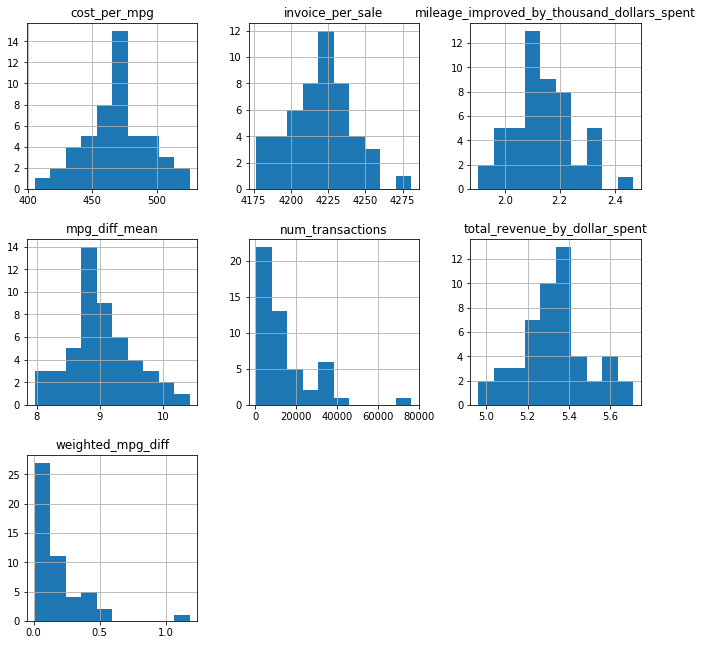

In [32]:
# see distribution of numeric metrics
import seaborn as sns

states[metrics].hist(figsize=(11,11))


In [33]:
top_10 = states.nlargest(10, 'mileage_improved_by_thousand_dollars_spent')
bottom_10 = states.nsmallest(10, 'mileage_improved_by_thousand_dollars_spent')
best_worst = top_10.append(bottom_10).sort_values(by='mileage_improved_by_thousand_dollars_spent', ascending=False)


In [34]:
states.mpg_diff_mean/states.trade_in_mileage_mean

state
AK    0.534469
AL    0.538344
AR    0.550025
AZ    0.625039
CA    0.647319
CO    0.634022
CT    0.596890
DE    0.549611
FL    0.568619
GA    0.554890
HI    0.550848
IA    0.569394
ID    0.597281
IL    0.552715
IN    0.569676
KS    0.565071
KY    0.566257
LA    0.507461
MA    0.586823
MD    0.589992
ME    0.584106
MI    0.524679
MN    0.598523
MO    0.562732
MS    0.529223
MT    0.628147
NC    0.585121
ND    0.561701
NE    0.550437
NH    0.579698
NJ    0.561260
NM    0.601739
NV    0.615158
NY    0.562142
OH    0.565126
OK    0.563751
OR    0.634789
PA    0.563698
RI    0.588287
SC    0.552467
SD    0.553902
TN    0.579839
TX    0.559993
UT    0.646595
VA    0.599009
VT    0.588823
WA    0.619121
WI    0.565832
WV    0.584090
WY    0.564740
dtype: float64

In [35]:
top_10 = best_worst.iloc[0:10]
bottom_10 = best_worst.iloc[10:]

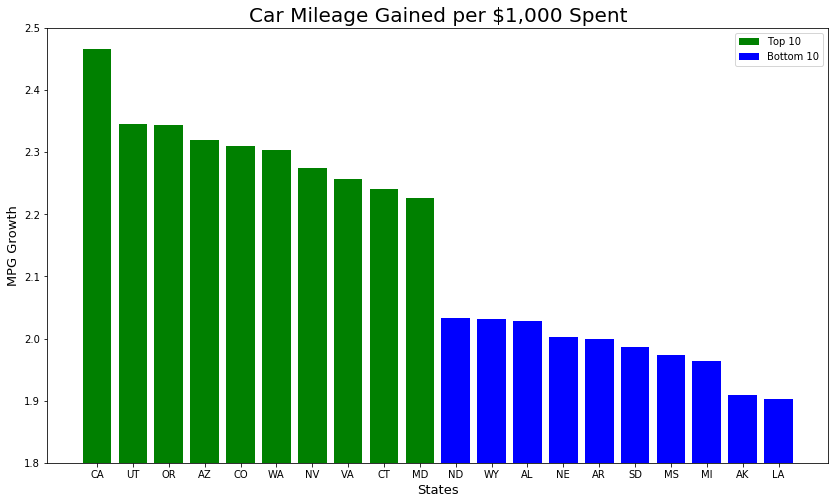

In [60]:
top_bottom = ['Top 10', 'Bottom 10']

plt.figure(figsize=(14,8))
plt.bar(top_10.index, 'mileage_improved_by_thousand_dollars_spent', data=top_10,
       color='G')
plt.bar(bottom_10.index, 'mileage_improved_by_thousand_dollars_spent', data=bottom_10,
       color='B')
plt.ylim(1.8, 2.5)
plt.xlabel('States', size=13)
plt.ylabel('MPG Growth', size=13)
plt.title('Car Mileage Gained per $1,000 Spent', size=20)
plt.legend(top_bottom)


In [37]:
states.to_csv('edmunds_cars_success_by_state.csv')

In [61]:
metrics = ['num_transactions','total_sales_revenue', 'invoice_per_sale', 'mpg_diff_mean',
           'percent_avg_mpg_improvement', 'total_revenue_by_dollar_spent', 'mileage_improved_by_thousand_dollars_spent',
          ]

states[metrics].sort_values(by='mileage_improved_by_thousand_dollars_spent', ascending=False).iloc[0:10]

,num_transactions,total_sales_revenue,invoice_per_sale,mpg_diff_mean,percent_avg_mpg_improvement,total_revenue_by_dollar_spent,mileage_improved_by_thousand_dollars_spent
state,,,,,,,
CA,76141,1693023970,4223.092683,10.416766,0.647319,5.265188,2.466620
UT,5532,118382985,4251.988431,9.969631,0.646595,5.032862,2.344699
OR,8701,188851928,4257.154350,9.979198,0.634789,5.098388,2.344101
AZ,9041,190359535,4244.607897,9.844376,0.625039,4.960444,2.319266
CO,8476,194300714,4245.634733,9.806395,0.634022,5.399342,2.309759
WA,12974,285307939,4236.472946,9.755896,0.619121,5.190815,2.302835
NV,3338,71942611,4233.672858,9.626723,0.615158,5.090759,2.273847
VA,23420,527486691,4210.076857,9.504313,0.599009,5.349764,2.257515
CT,9109,206832010,4222.142936,9.460863,0.596890,5.377917,2.240773


In [62]:
states[metrics].sort_values(by='mileage_improved_by_thousand_dollars_spent', ascending=False).iloc[40:50]

,num_transactions,total_sales_revenue,invoice_per_sale,mpg_diff_mean,percent_avg_mpg_improvement,total_revenue_by_dollar_spent,mileage_improved_by_thousand_dollars_spent
state,,,,,,,
ND,2076,49544925,4216.763006,8.575145,0.561701,5.659690,2.033585
WY,567,13599416,4200.176367,8.530864,0.564740,5.710441,2.031073
AL,7328,168336512,4186.681223,8.492222,0.538344,5.486849,2.028390
NE,5010,118371052,4214.770459,8.437725,0.550437,5.605752,2.001942
AR,5402,125110090,4237.319511,8.474269,0.550025,5.465709,1.999913
SD,2406,56618819,4219.035744,8.381962,0.553902,5.577659,1.986701
MS,2905,65623743,4196.729776,8.281928,0.529223,5.382746,1.973424
MI,30881,696637573,4181.940352,8.213788,0.524679,5.394332,1.964109
AK,1119,26523212,4229.222520,8.071492,0.534469,5.604482,1.908505


# Question 2
From the data, can you find any behavioral patterns that help us understand how
consumers buy new vehicles? Can the tendencies you found (if any) be applied to the
general population? Support your answer with models / visualizations / analyses, as
appropriate.

Thing to explore:
- day of week or day of month when sales are more likely? (sale date)
- average odometer reading at trade-in
- trade-in resigstration starts vs end (avg age of vehicle)

In [40]:
#check data types
import datetime as dt

cars['sale_date'] = pd.to_datetime(cars.sale_date, format='%d-%b-%y')
#dt.datetime.strptime(cars.sale_date, '%d-%b-%y')

In [41]:
to_date = lambda x: dt.datetime.strptime(x, '%d-%b-%y')

cars['trade_in_registration_start'] = cars['trade_in_registration_start'].apply(to_date)
cars['trade_in_registration_end'] = cars['trade_in_registration_end'].apply(to_date)


In [42]:
cars.groupby('sale_date')[['sale_date']].count()


,sale_date
sale_date,
2009-07-01,160
2009-07-02,183
2009-07-03,352
2009-07-04,212
2009-07-05,116
2009-07-06,497
2009-07-07,564
2009-07-08,530
2009-07-09,371


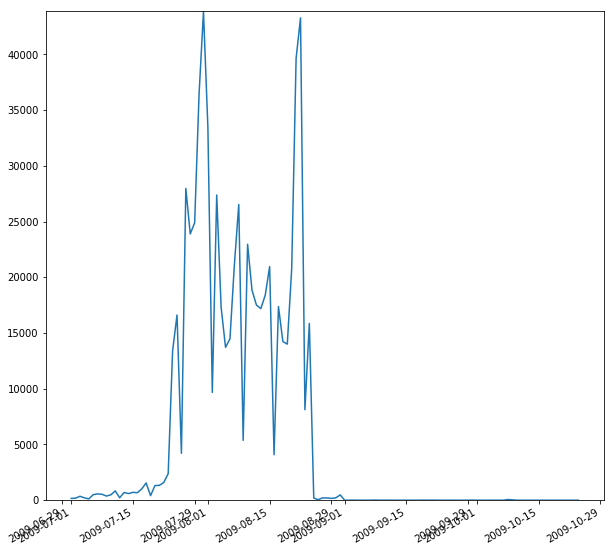

In [63]:
import matplotlib.dates as mdates

sales_over_time = cars.groupby('sale_date')[['sale_date']].count()
sales_over_time.set_index('sale_date')
y_lim = sales_over_time.max() + 100

fig, ax = plt.subplots(figsize=(10,10))
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_ylim(0, int(y_lim))
ax.plot(sales_over_time)
plt.gcf().autofmt_xdate()

In [44]:
cars['sales_month'] = cars.sale_date.dt.month

In [45]:
cars['sales_day_of_week'] = cars.sale_date.dt.weekday_name
cars['sales_day'] = cars.sale_date.dt.day

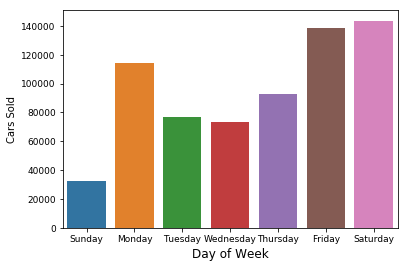

In [46]:
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

sns.countplot(x='sales_day_of_week', data=cars, label='small',
             order=days_order)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Cars Sold')
plt.tick_params(labelsize=9)


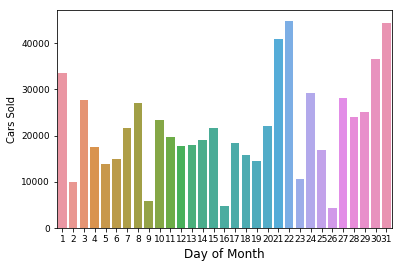

In [47]:
sns.countplot(x='sales_day', data=cars, label='small')
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Cars Sold')
plt.tick_params(labelsize=9)

In [49]:
cars['years_owned'] = (cars.trade_in_registration_end - cars.trade_in_registration_start)/np.timedelta64(1,'Y')

In [50]:
cars['years_owned'].describe()

count    672040.000000
mean          4.342420
std           4.274818
min         -55.434403
25%           1.998672
50%           2.086285
75%           5.694847
max          65.258014
Name: years_owned, dtype: float64

In [51]:
# show records that have negative years
cars.loc[cars['years_owned'] < 0, ['years_owned', 'trade_in_registration_start', 'trade_in_registration_end', 'sale_date']]
         

,years_owned,trade_in_registration_start,trade_in_registration_end,sale_date
1520,-4.813241,2005-10-25,2001-01-01,2009-08-19
1579,-0.210819,2009-06-01,2009-03-16,2009-08-05
1764,-0.169750,2009-12-29,2009-10-28,2009-07-30
2497,-0.109516,2009-06-30,2009-05-21,2009-07-27
2862,-0.008214,2009-02-03,2009-01-31,2009-08-05
3705,-15.085868,2009-07-31,1994-06-30,2009-07-31
3951,-0.213557,2009-04-19,2009-01-31,2009-08-20
4114,-0.109516,2009-11-20,2009-10-11,2009-07-24
4250,-0.032855,2009-12-12,2009-11-30,2009-08-10
4767,-4.000082,2007-12-31,2003-12-31,2009-08-24


In [66]:
#remove dirty values for age

cars = cars[cars['years_owned'] > 0]


In [107]:
numerical_features = ['invoice_amount', 'trade_in_mileage', 'trade_in_odometer_reading', 'new_vehicle_car_mileage', 
                      'new_vehicle_MSRP', 'mpg_diff', 'vehicle_age_difference']

cars[numerical_features].describe(percentiles=[0.05, 0.10, .25, .75, 0.90, .95])

,invoice_amount,trade_in_mileage,trade_in_odometer_reading,new_vehicle_car_mileage,new_vehicle_MSRP,mpg_diff,vehicle_age_difference
count,669310.000000,669310.000000,6.693100e+05,669310.000000,669310.000000,669310.000000,669310.000000
mean,4214.249003,15.808658,1.599437e+05,24.970431,22403.482355,9.161773,13.998793
std,451.771701,1.817577,2.669316e+05,5.736502,5840.727067,5.549384,4.112131
min,3500.000000,8.000000,0.000000e+00,14.000000,1.000000,-6.000000,0.000000
5%,3500.000000,13.000000,7.303045e+04,17.000000,14820.000000,2.000000,8.000000
10%,3500.000000,13.000000,8.914090e+04,19.000000,16100.000000,3.000000,9.000000
25%,3500.000000,15.000000,1.134870e+05,22.000000,17950.000000,5.000000,11.000000
50%,4500.000000,16.000000,1.447700e+05,25.000000,21705.000000,9.000000,14.000000
75%,4500.000000,18.000000,1.799620e+05,28.000000,25620.000000,12.000000,17.000000
90%,4500.000000,18.000000,2.172780e+05,29.000000,30415.000000,14.000000,20.000000


In [106]:
cars.loc[cars['years_owned'] > 65, ['trade_in_make', 'trade_in_model', ' trade_in_year', 'vehicle_age_difference']]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,trade_in_make,trade_in_model,trade_in_year,vehicle_age_difference
342038,Toyota,Previa,NaN,18
655918,GMC,C15 Pickup 2WD,NaN,24


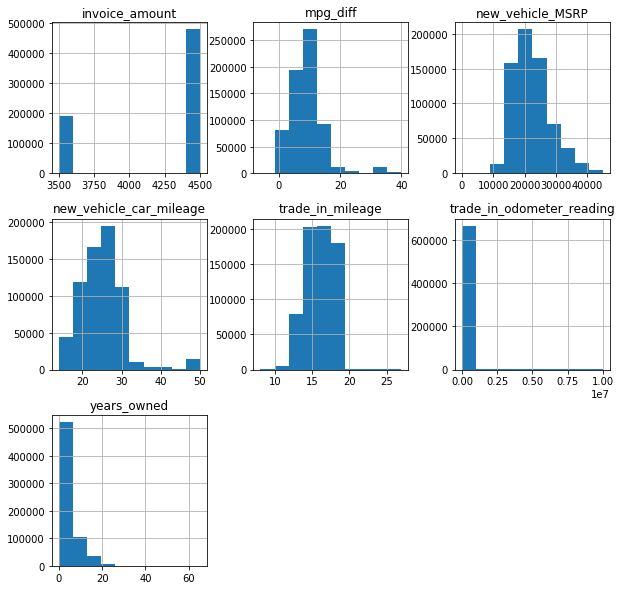

In [67]:
cars[numerical_features].hist(figsize=(10,10))
plt.tick_params(labelsize=9)

In [83]:
cars['vehicle_age_difference'] = cars.new_vehicle_year - cars.trade_in_year
cars['vehicle_age_difference'].describe()

count    669310.000000
mean         13.998793
std           4.112131
min           0.000000
25%          11.000000
50%          14.000000
75%          17.000000
max          26.000000
Name: vehicle_age_difference, dtype: float64

In [82]:
top_5_makes = cars['new_vehicle_make'].value_counts().head()

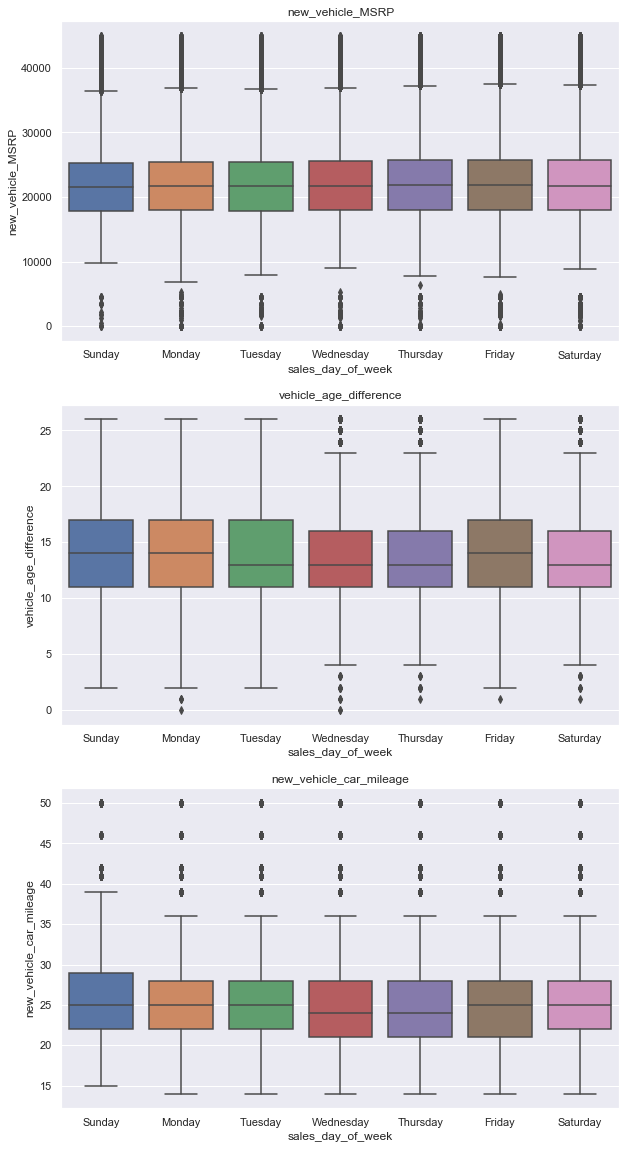

In [89]:
['invoice_amount', 'trade_in_mileage', 'trade_in_odometer_reading', 'new_vehicle_car_mileage', 
                      'new_vehicle_MSRP', 'mpg_diff', 'years_owned']


fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for name, ax in zip(['new_vehicle_MSRP', 'vehicle_age_difference', 'new_vehicle_car_mileage'], axes):
    sns.boxplot(data=cars, x='sales_day_of_week', y=name, ax=ax, order=days_order)
    ax.set_title(name)


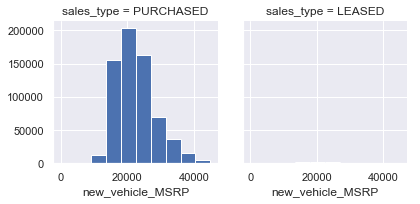

In [95]:
sns.set()

g = sns.FacetGrid(cars, col="sales_type")
g.map(plt.hist, 'new_vehicle_MSRP')

In [96]:
cars.sales_type.value_counts()

PURCHASED    663201
LEASED         6109
Name: sales_type, dtype: int64